<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/Jiay_ZhaoU7Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Sharing Demand

In my project, I will be looking at different factors that affect the number of public bikes being rented per hour in Seoul as a part of their public rental bike system. The dataset contains weather information such as temperature, humidity, visibility, dewpoint, solar radiation, precipitation, as well as information about the date and season during which bikes were rented.

In [ ]:
!pip install bambi

!pip install preliz

!pip install git+https://github.com/pydata/xarray.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-hl29g4gb
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-hl29g4gb
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for 

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
import preliz as pz

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/j1ayizhao/datascienceA2/refs/heads/main/SeoulBikeData%20-%20SeoulBikeData.csv')

In [ ]:
data = data.dropna()

In [ ]:
data

,Date,Rented,Hour,Temperature,Humidity(%),Wind_Speed,Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,13/01/2018,251,15,-1.5,62,0.9,957,-7.8,0.28,0.0,0.0,Winter,No Holiday,Yes
1,13/01/2018,249,16,-1.2,63,0.9,876,-7.3,0.19,0.0,0.0,Winter,No Holiday,Yes
2,13/01/2018,277,17,-1.4,68,1.0,761,-6.5,0.11,0.0,0.0,Winter,No Holiday,Yes
3,13/01/2018,223,18,-2.6,73,1.0,684,-6.7,0.01,0.0,0.0,Winter,No Holiday,Yes
4,13/01/2018,167,19,-3.3,76,0.8,633,-6.9,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,25/07/2018,2039,19,31.7,60,2.3,1492,22.9,0.23,0.0,0.0,Summer,No Holiday,Yes
2097,25/07/2018,1935,20,30.9,67,1.7,1470,24.0,0.05,0.0,0.0,Summer,No Holiday,Yes
2098,25/07/2018,1811,21,29.7,74,2.2,1342,24.5,0.00,0.0,0.0,Summer,No Holiday,Yes
2099,25/07/2018,1767,22,28.8,76,2.8,1231,24.1,0.00,0.0,0.0,Summer,No Holiday,Yes


## Variable Selection

Here, I used scatterplots to help me visualize and determine which variables show a clear causal relationship that I should further examine in my models. I chose the weather variables that I thought were most relevant, as well as the season categorical variable because I think it will have an effect on the number of bikes rented.

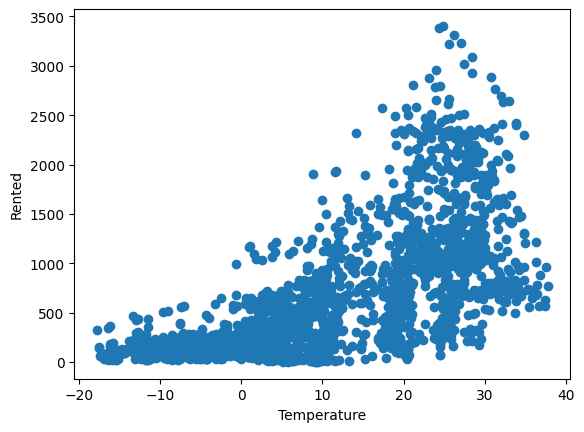

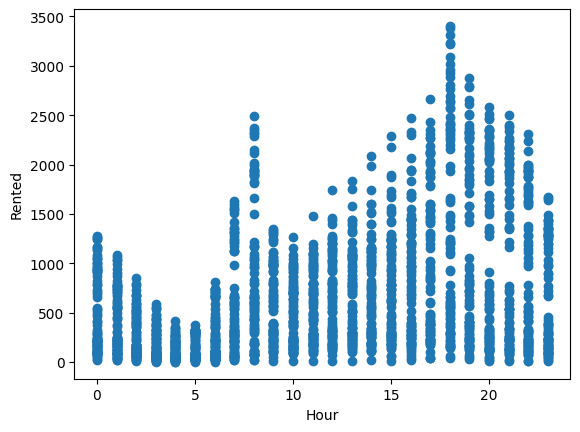

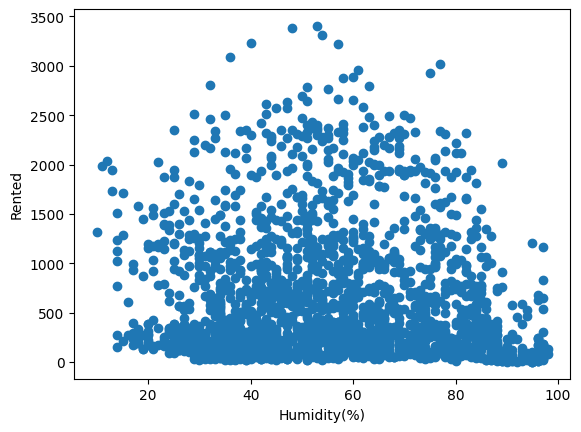

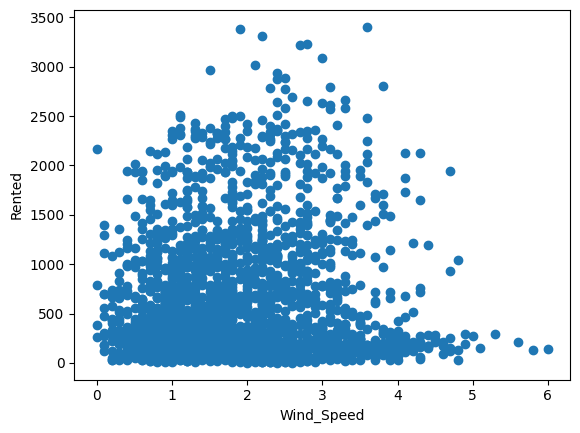

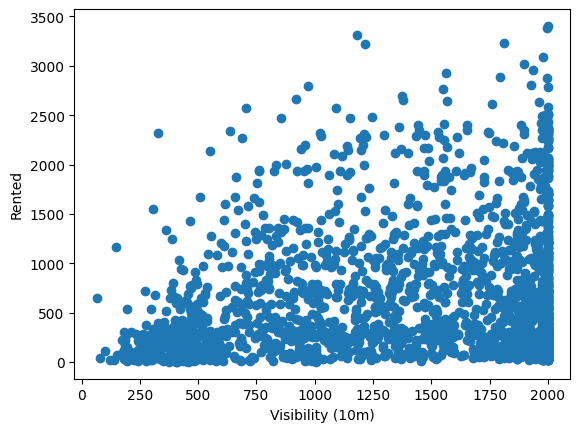

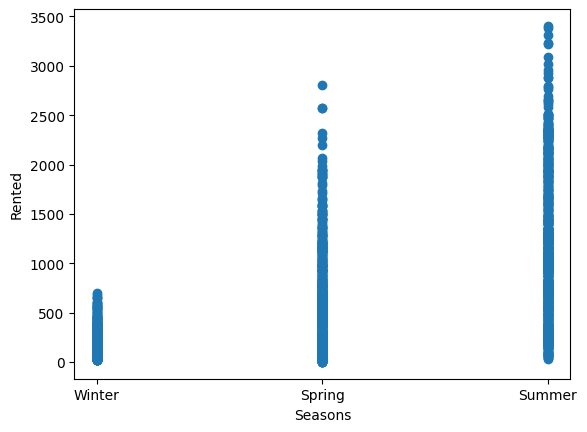

In [ ]:
x = ["Temperature", "Hour", "Humidity(%)", "Wind_Speed", "Visibility (10m)", "Seasons"]
y = "Rented"
for a in x:
  plt.scatter(data[a], data[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

Contrary to what I expected, humidity, wind speed, and visibility don't show much of a correlation to the response variable. Between the variables plotted, Temperature and Hour show the most distinct causal relationship. Bikes seem to increase exponentially with temperature, and there seems to be a curve we can fit into the relationship between hour of day and rented bikes. Additionally, a lot less bikes are rented during the winter vs. spring and summer, which indicates to us that the season variable may alter the effect of the hour and temperature on bikes rented, and I'm going to explore this further in my models

## Models

I will be trying multiple models with different combinations of the three variables of interest: temperature, hour, and seasons (as a categorical variable), and then comparing their elpd_loo values to see which model is the most predictive of rented bike count
*   Polynomial - Predictor: Hour
*   GLM - Predictor: Temperature

*   B-Spline - Predictor: Temperature
*   GLM - Predictors: Hour, Temperature, Seasons with interaction Temperature-Seasons






## 1. Polynomial - Hour

In [ ]:
model_poly_7 = bmb.Model("Rented ~ poly(Hour, degree=7)", data, family="negativebinomial")
idata_poly_7 = model_poly_7.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


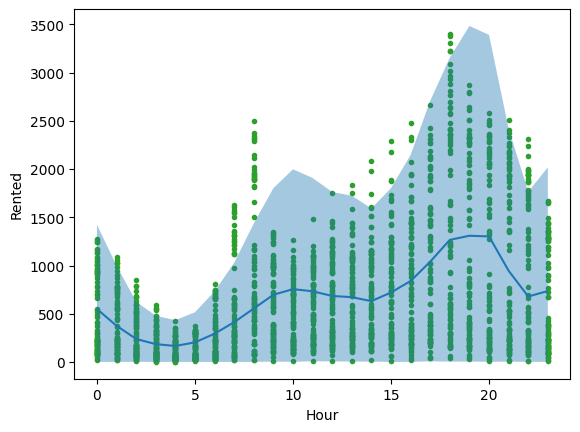

In [ ]:

#plot of posterior predictive dist
bmb.interpret.plot_predictions(model_poly_7, idata_poly_7, "Hour", pps=True)
#raw data
plt.plot(data.Hour, data.Rented, "C2.", zorder=-3)


To model hour vs. rented bikes, I used a polynomial because I knew the relationship was going to be non-linear and that the number of rented bikes would peak at certain hours. I used a higher degree to get the model to match better since we won't have to worry too much about overfitting when we know all the possible inputs of x (0-23)

## 2. GLM - Temperature

In [ ]:
model_lin_t = bmb.Model("Rented ~ Temperature", data)
idata_lin_t = model_lin_t.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


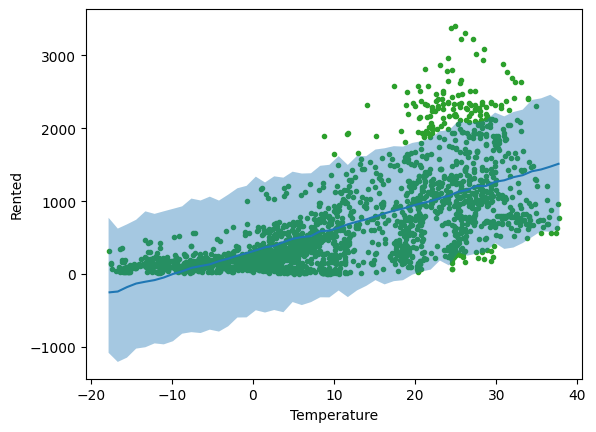

In [ ]:
bmb.interpret.plot_predictions(model_lin_t, idata_lin_t, "Temperature", pps=True)
plt.plot(data.Temperature, data.Rented, "C2.", zorder=-3)

I decided to use a GLM to model temperature vs. rented because I saw the relationship was roughly linear. But this model doesn't seem to be matching the data very well; it's predicting negative values and doesn't capture the upward curve near the 10-30 range. This tells us that a single predictor GLM for temperature is too simple and we may need to account for other factors like the season by adding interactions between other variables (which I will do in Model 4)

## 3. B-Spline - Temperature

In [ ]:

num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline_t = bmb.Model("Rented ~ bs(Temperature, degree=4, knots=knots)", data, family="negativebinomial")
idata_spline_t = model_spline_t.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


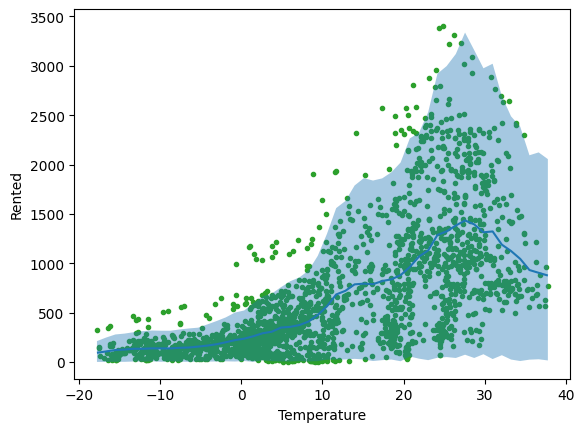

In [ ]:

bmb.interpret.plot_predictions(model_spline_t, idata_spline_t, "Temperature", pps= True)
plt.plot(data.Temperature, data.Rented, "C2.", zorder=-3)

The piecewise aspect of the B Spline allows us to model the nuances in the relationship a lot better, as different temperature ranges exhibit different behaviors. We can see that from -20 to 10, the increase is relatively linear, whereas after 10 degrees the slope becomes steeper, and begins to decrease as the temperature gets higher. However, this model doesn't quite predict the higher temperatures very well, but it IS predicting that bikes rented will go down as the temperature enters the 30s and decreases as the temperature drops below zero - which makes sense because people would go out less often if it gets too cold or too hot outside.

## 4. B Spline - Temperature, Hour

For my fourth model I decided to do a B Spline with both temperature and hour because the B Spline offers the flexibility that would likely capture the nuances within both variables. It would work better than the single variable B Spline, which doesn't account for how the effect of temperature changes throughout the day.

In [ ]:
num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
knots_hour= [0, 5, 8, 10, 18]
model_spline_t_h = bmb.Model("Rented ~ bs(Temperature, degree=4, knots=knots) + bs(Hour, degree=4, knots=knots_hour )", data, family="negativebinomial")
idata_spline_t_h = model_spline_t_h.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


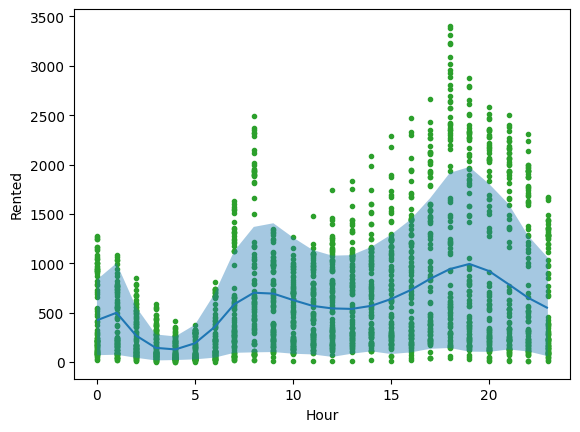

In [ ]:
bmb.interpret.plot_predictions(model_spline_t_h, idata_spline_t_h, "Hour", pps= True)
plt.plot(data.Hour, data.Rented, "C2.", zorder=-3)

The end behaviors for hour vs. rented seems to be more certain than that of the polynomial model. The B Spline model is anticipating that bike counts decrease later into the night, but it is less certain with the trends of higher temperatures.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


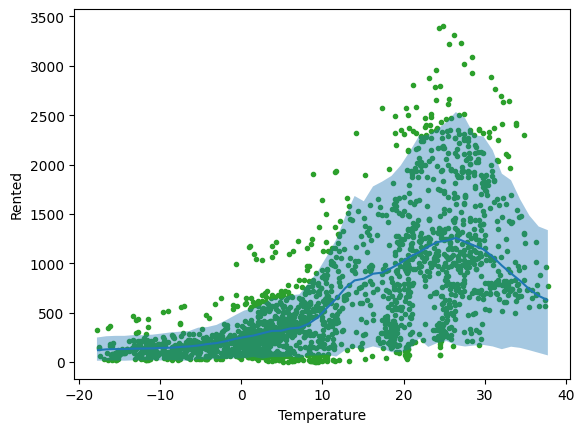

In [ ]:
bmb.interpret.plot_predictions(model_spline_t_h, idata_spline_t_h, "Temperature", pps= True)
plt.plot(data.Temperature, data.Rented, "C2.", zorder=-3)

## 5. GLM - Temperature, Hour, Seasons

For my final model, I decided to use the predictors Hour, Temperature, and Season. I added an interaction between Season and Temperature because I thought the effect of temperature on rented bikes might change based on the season. For example, a ~10 degree (mild) temperature might be more appealing for bike riders in the summer than in the winter, where such temperatures are already prevalent season-round.

In [ ]:
model_6 = bmb.Model("`Rented` ~ `Hour` + Temperature + `Temperature`:'Seasons'", data=data)
#create the model
idata_6 = model_6.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 3 Axes>,
 array([<Axes: title={'center': 'Seasons = Spring'}, xlabel='Temperature', ylabel='Rented'>,
        <Axes: title={'center': 'Seasons = Summer'}, xlabel='Temperature', ylabel='Rented'>,
        <Axes: title={'center': 'Seasons = Winter'}, xlabel='Temperature', ylabel='Rented'>],
       dtype=object))

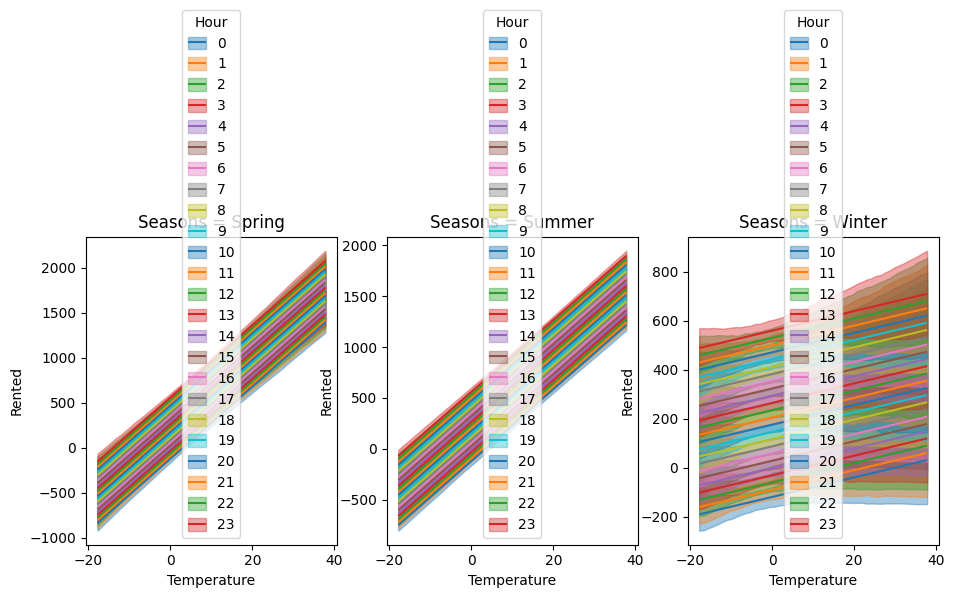

In [ ]:
bmb.interpret.plot_predictions(model_6,
                               idata_6,
                               ["Temperature","Hour","Seasons"],
                               fig_kwargs={"figsize":(11, 4)})

Froom the looks of the graph the model doesn't seem to be doing a good job at predicting bike counts. Even though it captures the general upwards trend it is predicting negative bike counts, and we know that the temperature relationship is not entirely linear. The negative bike counts could be a result of the non-linear variable relationships, which resulted in the unrealistic predictions

## Model Comparison

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

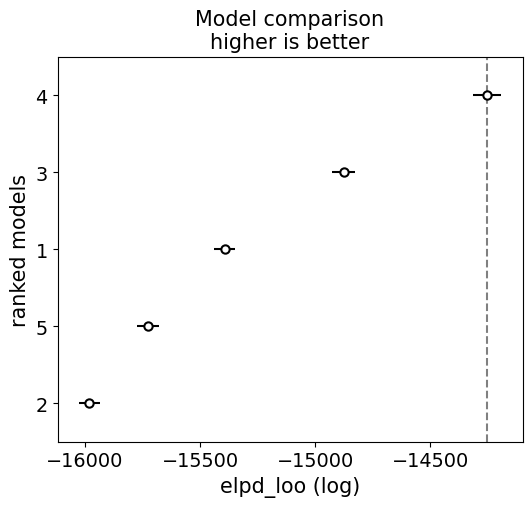

In [ ]:
comp = az.compare({"1":idata_poly_7, "2": idata_lin_t, "3": idata_spline_t, "4": idata_spline_t_h, "5": idata_6, })
az.plot_compare(comp)

Looking at the elpd_loo values, the B Spline model with multiple predictors seems to work the best, and my final GLM model appears to perform badly compared to the others, which is what I expected given its negative bike count predictions. The Temperature/Hour B Spline model works the best because of the non-linear relationships of both variables, and adding the knots allowed the model to capture these effects better. Having the interaction between these two variables likely increased the predictive accuracy because the model isn't assuming that the temperature has the same effect at all times of the day the way it is oversimplified in the single predictor B Spline.